# test notebook to read data from h5

In [1]:
import os
import sys
import numpy as np
import scipy as sp
import pandas as pd         # pandas tabular DataFrame for task/behavioral data
import matplotlib as mpl    # plot
import matplotlib.pyplot as plt
import re                   # regular expression
import time                 # time code execution
import pickle
import warnings
import h5py

import dg2df                # for DLSH dynamic group (behavioral data)
import neo                  # data structure for neural data
import quantities as pq
import signal_align         # in this package: align neural data according to task
import PyNeuroAna as pna    # in this package: analysis
import PyNeuroPlot as pnp   # in this package: plot
import misc_tools           # in this package: misc

import data_load_DLSH       # package specific for DLSH lab data


/shared/homes/sguan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
class DataNeural(dict):
    def __init__(self, data_dict):
        for (key, value) in data_dict.items():
            self[key] = value
#temp0=DataNeural(temp)

signal_info_detail = pd.read_pickle('/shared/homes/sguan/Coding_Projects/support_data/spike_wf_info_Dante.pkl')
def set_signal_id(signal_info):
    signal_info['signal_id'] = signal_info['date'].apply(lambda x: '{:0>6}'.format(x)).str.cat(
        [signal_info['channel_index'].apply(lambda x: '{:0>2}'.format(x)),
        signal_info['sort_code'].apply(lambda x: '{:0>1}'.format(x))],
        sep='_'
        )
    return signal_info
signal_info_detail = set_signal_id(signal_info_detail)


dir_data_save = '/shared/homes/sguan/Coding_Projects/support_data'
block_type = 'srv_mask'   # one of ['srv_mask', 'matchnot']
signal_type = 'spk'

hdf_file_path = '{}/all_data_dante_{}.hdf5'.format(dir_data_save, 'srv_mask')
hf_srv_mask = h5py.File(hdf_file_path, 'r')

hdf_file_path = '{}/all_data_dante_{}.hdf5'.format(dir_data_save, 'matchnot')
hf_matchnot = h5py.File(hdf_file_path, 'r')


In [16]:
list_psth_srv_mask = []
list_signal_srv_mask = []
list_psth_matchnot = []
list_signal_matchnot = []
for date in list(hf_srv_mask.keys()):
    print(date, 'reading_dg, srv_mask')
    data_df_srv_mask = pd.read_json(hf_srv_mask[date]['trial_info_json'][()])
    
    print(date, 'reading_neural, srv_mask')
    data_neural_srv_mask = dict([])
    data_neural_srv_mask['data'] = hf_srv_mask[date][signal_type]['data'][:]
    data_neural_srv_mask['ts'] = hf_srv_mask[date][signal_type]['ts'][:]
    data_neural_srv_mask['signal_id'] = hf_srv_mask[date][signal_type]['signal_id'][:]
    data_neural_srv_mask['trial_info'] = data_df_srv_mask
    data_neural_srv_mask = signal_align.neuro_sort(data_df_srv_mask, grpby=['stim_familiarized','mask_opacity_int'], neuro=data_neural_srv_mask)
    psth_srv_mask = pna.GroupAve(data_neural_srv_mask)
    list_psth_srv_mask.append(psth_srv_mask)
    list_signal_srv_mask.append(data_neural_srv_mask['signal_id'])

for date in list(hf_matchnot.keys()):
    print(date, 'reading_dg, matchnot')
    data_df_matchnot = pd.read_json(hf_matchnot[date]['trial_info_json'][()])
    
    print(date, 'reading_neural, matchnot')
    data_neural_matchnot = dict([])
    data_neural_matchnot['data'] = hf_matchnot[date][signal_type]['data'][:]
    data_neural_matchnot['ts'] = hf_matchnot[date][signal_type]['ts'][:]
    data_neural_matchnot['signal_id'] = hf_matchnot[date][signal_type]['signal_id'][:]
    data_neural_matchnot['trial_info'] = data_df
    data_neural_matchnot = signal_align.neuro_sort(data_df_matchnot, grpby=['stim_familiarized','mask_opacity_int'], neuro=data_neural_matchnot)
    psth_matchnot = pna.GroupAve(data_neural_matchnot)
    list_psth_matchnot.append(psth_matchnot)
    list_signal_matchnot.append(data_neural_matchnot['signal_id'])
    


161015 reading_dg, srv_mask
161015 reading_neural, srv_mask
161023 reading_dg, srv_mask
161023 reading_neural, srv_mask
161026 reading_dg, srv_mask
161026 reading_neural, srv_mask
161029 reading_dg, srv_mask
161029 reading_neural, srv_mask
161118 reading_dg, srv_mask
161118 reading_neural, srv_mask
161121 reading_dg, srv_mask
161121 reading_neural, srv_mask
161125 reading_dg, srv_mask
161125 reading_neural, srv_mask
161202 reading_dg, srv_mask
161202 reading_neural, srv_mask
161206 reading_dg, srv_mask
161206 reading_neural, srv_mask
161222 reading_dg, srv_mask
161222 reading_neural, srv_mask
161228 reading_dg, srv_mask
161228 reading_neural, srv_mask
170103 reading_dg, srv_mask
170103 reading_neural, srv_mask
170106 reading_dg, srv_mask
170106 reading_neural, srv_mask
170113 reading_dg, srv_mask
170113 reading_neural, srv_mask
170117 reading_dg, srv_mask
170117 reading_neural, srv_mask
170214 reading_dg, srv_mask
170214 reading_neural, srv_mask
170221 reading_dg, srv_mask
170221 readi

(6, 813, 167)


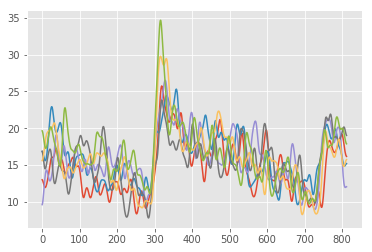

In [78]:
temp = psth_all_smooth[:, :, signal_full_srv_mask['area']=='TEd']
print(temp.shape)
plt.plot(temp[:,:,100].transpose())
plt.show()
plt.close('all')

(6, 813, 505) (6, 813) (505, 10) (448, 10)


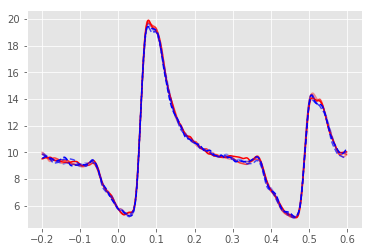

In [82]:
ts_srv_mask = data_neural_srv_mask['ts']
ts_matchnot = data_neural_matchnot['ts']
signal_srv_mask = np.concatenate(list_signal_srv_mask).astype('str')
signal_matchnot = np.concatenate(list_signal_matchnot).astype('str')
signal_all = np.unique(np.concatenate(list_signal_srv_mask + list_signal_matchnot).astype('str'))

psth_all_srv_mask = np.concatenate(list_psth_srv_mask, axis=2)
psth_all_matchnot = np.concatenate(list_psth_matchnot, axis=2)
signal_full_srv_mask = pd.DataFrame({'signal_id': signal_srv_mask}).merge(signal_info_detail, how='inner', on=['signal_id'], copy=False)
signal_full_matchnot = pd.DataFrame({'signal_id': signal_matchnot}).merge(signal_info_detail, how='inner', on=['signal_id'], copy=False)



psth_all_smooth = pna.SmoothTrace(psth_all_srv_mask, sk_std=0.005, ts=ts_srv_mask, axis=1)
psth_plot = np.mean(psth_all_smooth[:, :, signal_full_srv_mask['area']=='V4'], axis=2)

print(psth_all_srv_mask.shape, psth_plot.shape, signal_full_srv_mask.shape, signal_full_matchnot.shape)

list_color = ['r','r','r','b','b','b']
list_ls = ['-', '-', '-', '--', '--', '--']
list_alpha = [1.0, 0.7, 0.4, 1.0, 0.7, 0.4]

for i in range(6):
    plt.plot(ts_srv_mask, psth_plot[i, :], color=list_color[i], ls = list_ls[i], alpha = list_alpha[i])
plt.show()
plt.close('all')

if False:
    psth_all_smooth = pna.SmoothTrace(psth_all_srv_mask, sk_std=0.020, ts=ts_srv_mask, axis=1)
    psth_plot = psth_all_smooth[2][:, (signal_full_srv_mask['wf_type']=='BS') * (signal_full_srv_mask['area']=='TEd')]
    list_color = pnp.gen_distinct_colors(psth_plot.shape[1])
    for i in range(psth_plot.shape[1]):
        plt.plot(ts_srv_mask, psth_plot[:,i], color=list_color[i])
    plt.title('TEm_BS_by_cells')
    #plt.savefig('./temp_figs/TEm_BS_by_cells')
    plt.show()
    plt.close('all')

In [5]:
print(signal_info_detail)

        date   signal_name  channel_index  sort_code  num_spk wf_type  \
0     161015   Chan1 Code1              1          1    33798           
1     161015   Chan1 Code2              1          2     5871           
2     161015   Chan2 Code2              2          2    42438           
3     161015   Chan3 Code0              3          0     5552           
4     161015   Chan4 Code0              4          0     6540           
5     161015   Chan5 Code1              5          1    17848           
6     161015   Chan6 Code0              6          0        1           
7     161015   Chan6 Code1              6          1     8471           
8     161015   Chan7 Code0              7          0     8298           
9     161015   Chan8 Code0              8          0        4           
10    161015   Chan8 Code1              8          1    11336           
11    161015   Chan9 Code0              9          0     7307           
12    161015   Chan9 Code1              9          

161015 reading_dg
161015 reading_neural
161023 reading_dg
161023 reading_neural
161026 reading_dg
161026 reading_neural
161029 reading_dg
161029 reading_neural
161118 reading_dg
161118 reading_neural
161121 reading_dg
161121 reading_neural
161125 reading_dg
161125 reading_neural
161202 reading_dg
161202 reading_neural
161206 reading_dg
161206 reading_neural
161222 reading_dg
161222 reading_neural
161228 reading_dg
161228 reading_neural
170103 reading_dg
170103 reading_neural
170106 reading_dg
170106 reading_neural
170113 reading_dg
170113 reading_neural
170117 reading_dg
170117 reading_neural
170214 reading_dg
170214 reading_neural
170221 reading_dg
170221 reading_neural


/shared/homes/sguan/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/shared/homes/sguan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/shared/homes/sguan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


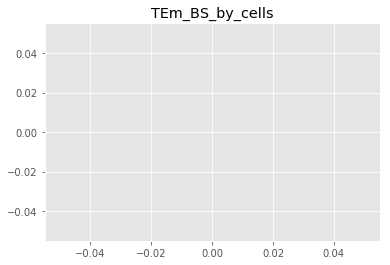

In [11]:
date = '161023'
data_df = pd.read_json(hf[date]['trial_info_json'][()])
# data_df = pd.read_hdf(hdf_file_path, '{}/trial_info'.format(date))
data_neural = dict([])
data_neural['data'] = hf[date][signal_type]['data'][:]
data_neural['ts'] = hf[date][signal_type]['ts'][:]
data_neural['signal_id'] = hf[date][signal_type]['signal_id'][:]
data_neural['trial_info'] = data_df

list_date = hf.keys()
list_psth = []
list_signal = []
for date in list_date:
    print(date, 'reading_dg')
    data_df = pd.read_json(hf[date]['trial_info_json'][()])
    # data_df = pd.read_hdf(hdf_file_path, '{}/trial_info'.format(date))
    print(date, 'reading_neural')
    data_neural = dict([])
    data_neural['data'] = hf[date][signal_type]['data'][:]
    data_neural['ts'] = hf[date][signal_type]['ts'][:]
    data_neural['signal_id'] = hf[date][signal_type]['signal_id'][:]
    data_neural['trial_info'] = data_df
    data_neural = signal_align.neuro_sort(data_df, grpby=['stim_familiarized','mask_opacity_int'], neuro=data_neural)
    psth = pna.GroupAve(data_neural)
    list_psth.append(psth)
    list_signal.append(data_neural['signal_id'])

ts = data_neural['ts']
signal_all = np.concatenate(list_signal)
psth_all = np.concatenate(list_psth, axis=2)
signal_full = pd.DataFrame({'signal_id': signal_all}).merge(signal_info_detail, how='inner', on=['signal_id'], copy=False)

psth_all_smooth = pna.SmoothTrace(psth_all, sk_std=0.005, ts=ts, axis=1)
psth_plot = np.mean(psth_all_smooth[:, :, (signal_full['wf_type']=='BS') * (signal_full['area']=='TEm')], axis=2)

list_color = ['r','r','r','b','b','b']
list_ls = ['-', '-', '-', '--', '--', '--']
list_alpha = [1.0, 0.7, 0.4, 1.0, 0.7, 0.4]

for i in range(6):
    plt.plot(ts, psth_plot[i, :], color=list_color[i], ls = list_ls[i], alpha = list_alpha[i])

psth_all_smooth = pna.SmoothTrace(psth_all, sk_std=0.020, ts=ts, axis=1)
psth_plot = psth_all_smooth[2][:, (signal_full['wf_type']=='BS') * (signal_full['area']=='TEm')]
list_color = pnp.gen_distinct_colors(psth_plot.shape[1])
for i in range(psth_plot.shape[1]):
    plt.plot(ts, psth_plot[:,i], color=list_color[i])
plt.title('TEm_BS_by_cells')
#plt.savefig('./temp_figs/TEm_BS_by_cells')
plt.show()
plt.close('all')



/shared/homes/sguan/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


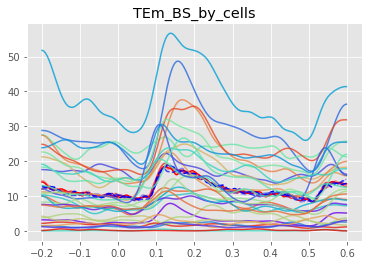

In [35]:
ts = data_neural['ts']
signal_all = np.concatenate(list_signal)
psth_all = np.concatenate(list_psth, axis=2)
signal_full = pd.DataFrame({'signal_id': signal_all.astype('str')}).merge(signal_info_detail, how='inner', on=['signal_id'], copy=False)

psth_all_smooth = pna.SmoothTrace(psth_all, sk_std=0.005, ts=ts, axis=1)
psth_plot = np.mean(psth_all_smooth[:, :, (signal_full['wf_type']=='BS') * (signal_full['area']=='TEm')], axis=2)

list_color = ['r','r','r','b','b','b']
list_ls = ['-', '-', '-', '--', '--', '--']
list_alpha = [1.0, 0.7, 0.4, 1.0, 0.7, 0.4]

for i in range(6):
    plt.plot(ts, psth_plot[i, :], color=list_color[i], ls = list_ls[i], alpha = list_alpha[i])

psth_all_smooth = pna.SmoothTrace(psth_all, sk_std=0.020, ts=ts, axis=1)
psth_plot = psth_all_smooth[2][:, (signal_full['wf_type']=='BS') * (signal_full['area']=='TEm')]
list_color = pnp.gen_distinct_colors(psth_plot.shape[1])
for i in range(psth_plot.shape[1]):
    plt.plot(ts, psth_plot[:,i], color=list_color[i])
plt.title('TEm_BS_by_cells')
#plt.savefig('./temp_figs/TEm_BS_by_cells')
plt.show()
plt.close('all')